# Case Study on ANOVA
**Sreehari P S**<br>
*Norka B5*
***

**Statement**<br>
XYZ Company has offices in four different zones. The company wishes to investigate the following :<br>
● The mean sales generated by each zone.<br>
● Total sales generated by all the zones for each month.<br>
● Check whether all the zones generate the same amount of sales.<br>
Help the company to carry out their study with the help of data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./datasets/Sales_data_zone_wise.csv')
print('Sample shape = ',data.shape)
data.head()

Sample shape =  (29, 5)


,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


**Describe the data**

In [3]:
dis = data.describe().T.round(3)
dis

,count,mean,std,min,25%,50%,75%,max
Zone - A,29.0,1540493.138,261940.062,1128185.0,1305972.0,1534390.0,1820196.0,2004480.0
Zone - B,29.0,1755559.586,168389.886,1527574.0,1606010.0,1740365.0,1875658.0,2091194.0
Zone - C,29.0,1772871.034,333193.725,1237722.0,1523308.0,1767047.0,2098463.0,2290580.0
Zone - D,29.0,1842926.759,375016.479,1234311.0,1520406.0,1854412.0,2180416.0,2364132.0


Zone - A    1540493.138
Zone - B    1755559.586
Zone - C    1772871.034
Zone - D    1842926.759
Name: mean, dtype: float64

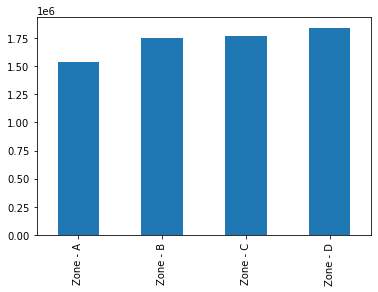

In [4]:
dis['mean'].plot(kind = 'bar')
dis['mean']

The mean sales of the 4 zones are described above. It can be observed that **Zone-D** has the higest sales figures followed by **Zone-C** followed by **Zone-B** and at last position is **Zone-A**. The sales figures of Zone-B and Zone-C are comparable.
***

### Total sales generated by Zones in each month

In [5]:
data['Total Sales'] = data[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(axis=1)
data[['Month','Total Sales']]

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


### Check whether all the zones generate the same amount of sales

**H0 = All Zones generate same amount of sales<br>
H1 = Sales of atleast one Zone differs**

In [6]:
from scipy.stats import f_oneway
stat, p = f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
print('Stats = ',stat)
print('P-Value = ',p)

Stats =  5.672056106843581
P-Value =  0.0011827601694503335


In [7]:
if(p>0.05):
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


Therefore it can be concluded that all zones generate different amount of sales
***